In [2]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 15

In [3]:
Q5to11 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Qfac_eigensweep_5to11GHz.csv', skiprows=4)
Q1to5 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Qfac_eigensweep_1to5GHz.csv', skiprows=4)

In [4]:
Q5to11

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,5.000000e+09,4.628162904838757+0.056213986510173126i,4.628163,41.165582
1,5.000000e+09,4.628537993150745+0.056543966106898096i,4.628538,40.928664
2,5.000000e+09,4.6455593170708225+0.018875172634287358i,4.645559,123.060048
3,5.000000e+09,4.646160808283856+0.018871334710491468i,4.646161,123.101012
4,5.000000e+09,4.650254443869332+0.017912079269131024i,4.650254,129.807779
...,...,...,...,...
3271,1.100000e+10,11.097586203363688+0.019153759188844252i,11.097586,289.697341
3272,1.100000e+10,11.098677620714065+0.016451068027523136i,11.098678,337.323923
3273,1.100000e+10,11.099977421129719+0.01715419172190427i,11.099977,323.535425
3274,1.100000e+10,11.100192941908317+0.02127578999332274i,11.100193,260.864413


In [5]:
def plot_Qvfreq(df):
    plt.plot(df['Frequency (GHz)'], df['Quality factor (1)'])
    plt.xlabel('Freq (GHz)')
    plt.ylabel('Q factor')
    plt.title('Q Factor vs. Eigenfrequency')

NameError: name 'top_peaks' is not defined

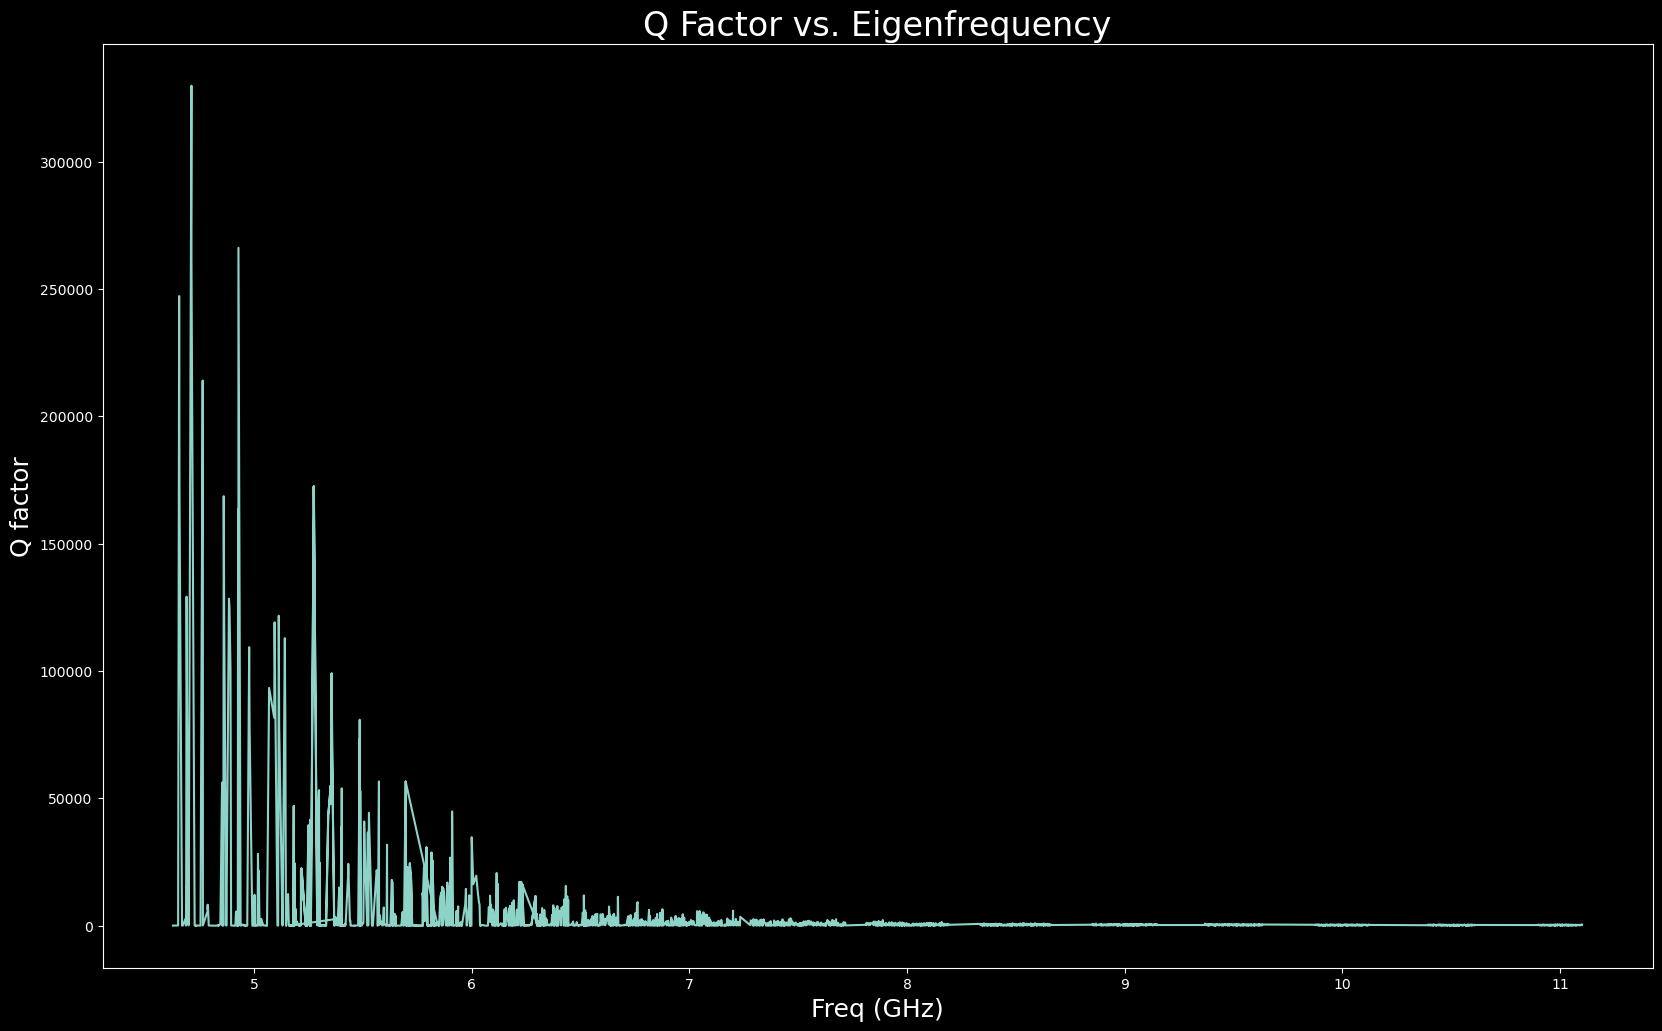

In [6]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q5to11)
for i in range(len(top_peaks)):
    plt.scatter(top_peaks['freqs'].loc[i], top_peaks['Q'].loc[i], 
                label = f'({top_peaks["freqs"][i]} GHz, {top_peaks["Q"][i]})')
plt.legend()

In [7]:
all_Q = pd.concat([Q1to5, Q5to11])

In [8]:
Q1to5

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1.000000e+09,6.830189170012751E-15+0.2445979144776972i,6.830189e-15,1.396208e-14
1,1.000000e+09,3.27849080160612E-14+0.25682555180211736i,3.278491e-14,6.382719e-14
2,1.000000e+09,-1.2142558524467114E-15+0.7279293765572199i,-1.214256e-15,-8.340478e-16
3,1.000000e+09,-7.133753133124429E-15+0.7288109866512557i,-7.133753e-15,-4.894104e-15
4,1.000000e+09,1.931087241479181E-10-1.0667860374540662E-6i,1.931087e-10,9.050959e-05
...,...,...,...,...
1957,4.500000e+09,4.914948370702858+0.020805014772947626i,4.914948e+00,1.181193e+02
1958,4.500000e+09,4.917434238740645+4.6293000632622715E-4i,4.917434e+00,5.311207e+03
1959,4.500000e+09,4.918208191862103+4.4181046560515057E-4i,4.918208e+00,5.565971e+03
1960,4.500000e+09,4.920111046737906+0.0367318309006274i,4.920111e+00,6.697340e+01


In [9]:
Q1to5

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,1.000000e+09,6.830189170012751E-15+0.2445979144776972i,6.830189e-15,1.396208e-14
1,1.000000e+09,3.27849080160612E-14+0.25682555180211736i,3.278491e-14,6.382719e-14
2,1.000000e+09,-1.2142558524467114E-15+0.7279293765572199i,-1.214256e-15,-8.340478e-16
3,1.000000e+09,-7.133753133124429E-15+0.7288109866512557i,-7.133753e-15,-4.894104e-15
4,1.000000e+09,1.931087241479181E-10-1.0667860374540662E-6i,1.931087e-10,9.050959e-05
...,...,...,...,...
1957,4.500000e+09,4.914948370702858+0.020805014772947626i,4.914948e+00,1.181193e+02
1958,4.500000e+09,4.917434238740645+4.6293000632622715E-4i,4.917434e+00,5.311207e+03
1959,4.500000e+09,4.918208191862103+4.4181046560515057E-4i,4.918208e+00,5.565971e+03
1960,4.500000e+09,4.920111046737906+0.0367318309006274i,4.920111e+00,6.697340e+01


In [10]:
Q4 = Q1to5[Q1to5['% search_freq (Hz)']==4000000000].reset_index(inplace=False)
peaks_4, _ = spg.find_peaks(Q4['Quality factor (1)'])
peaks_4

array([  5,   9,  14,  17,  23,  26,  28,  31,  34,  37,  40,  42,  44,
        46,  49,  53,  55,  58,  60,  63,  66,  68,  71,  76,  78,  81,
        84,  89,  92,  95,  97, 103, 109, 114, 122, 126, 130, 133, 135,
       138, 142, 146, 149, 154, 157, 160, 164, 166, 168, 170, 172, 176,
       178, 183, 186, 188, 190, 194, 197, 200, 205, 207, 215, 220, 223,
       228, 231, 238, 243, 245, 247, 250])

In [11]:
Q4.loc[peaks_4]

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
5,1463,4.000000e+09,3.6153513162138773+0.012406502999599294i,3.615351,1.457039e+02
9,1467,4.000000e+09,3.6364927187631193+6.86940371412244E-7i,3.636493,2.646877e+06
14,1472,4.000000e+09,3.6542535657611825+1.0048740319823617E-6i,3.654254,1.818265e+06
17,1475,4.000000e+09,3.6850413773788686+3.117542370292587E-4i,3.685041,5.910170e+03
23,1481,4.000000e+09,3.71412459255703+0.02600630740199998i,3.714125,7.140815e+01
...,...,...,...,...,...
238,1696,4.000000e+09,4.4253873741297065+1.528708169127896E-5i,4.425387,1.447427e+05
243,1701,4.000000e+09,4.450054732745428+0.02174362276413344i,4.450055,1.023301e+02
245,1703,4.000000e+09,4.451509531623005+0.012050842929649426i,4.451510,1.846970e+02
247,1705,4.000000e+09,4.452526109765686+5.8282680747923E-6i,4.452526,3.819768e+05


In [12]:
param_array = np.array([1000000000, 1500000000, 2000000000, 2500000000, 
                        3000000000, 3500000000, 4000000000, 4500000000])

peak_index_dict_2 = {}
peak_table_step_list = []
for i in range(len(param_array)):
    signal_step_i = Q1to5[Q1to5['% search_freq (Hz)']==param_array[i]].reset_index(inplace=False)
    peaks_i, _ = spg.find_peaks(signal_step_i['Quality factor (1)'])
    Q_peaks_i = signal_step_i.loc[peaks_i].sort_values('Quality factor (1)', ascending=False)
    Qpeaks_top10 = Q_peaks_i.iloc[0:9]
    peak_table_step_list.append(Qpeaks_top10)
    peak_index_dict_2[i] = {'CF': param_array[i], 'indices': Qpeaks_top10.index}


In [13]:
# for pulling peak Q factors out of COMSOL eigenfrequency data 
def peak_index_finder(Q_set, params): 
    peak_index_dict = {}
    peak_table_step_list = []
    for i in range(len(params)):
        signal_step_i = Q_set[Q_set['% search_freq (Hz)']==params[i]].reset_index(inplace=False)
        peaks_i, _ = spg.find_peaks(signal_step_i['Quality factor (1)'])
        Q_peaks_i = signal_step_i.loc[peaks_i].sort_values('Quality factor (1)', ascending=False)
        Qpeaks_top10 = Q_peaks_i.iloc[0:9]
        peak_table_step_list.append(Qpeaks_top10)
        peak_index_dict[i] = {'CF': param_array[i], 'indices': Qpeaks_top10.index}
    return peak_index_dict, peak_table_step_list

In [14]:
peak_index_dict_2

{0: {'CF': 1000000000,
  'indices': Index([209, 167, 197, 131, 34, 160, 103, 36, 30], dtype='int64')},
 1: {'CF': 1500000000,
  'indices': Index([234, 189, 211, 147, 177, 111, 140, 83, 113], dtype='int64')},
 2: {'CF': 2000000000,
  'indices': Index([246, 207, 224, 162, 184, 120, 150, 84, 113], dtype='int64')},
 3: {'CF': 2500000000,
  'indices': Index([227, 238, 181, 198, 136, 158, 94, 124, 58], dtype='int64')},
 4: {'CF': 3000000000,
  'indices': Index([247, 206, 250, 213, 152, 167, 106, 123, 61], dtype='int64')},
 5: {'CF': 3500000000,
  'indices': Index([142, 80, 147, 213, 87, 30, 216, 41, 6], dtype='int64')},
 6: {'CF': 4000000000,
  'indices': Index([9, 14, 60, 122, 63, 197, 130, 247, 250], dtype='int64')},
 7: {'CF': 4500000000,
  'indices': Index([33, 93, 112, 194, 96, 166, 210, 134, 64], dtype='int64')}}

In [15]:
peak_index_dict_2[5]

{'CF': 3500000000,
 'indices': Index([142, 80, 147, 213, 87, 30, 216, 41, 6], dtype='int64')}

In [222]:
Q_peaks_i

,index,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
33,1743,4.500000e+09,4.251601124202013+3.069593384558052E-6i,4.251601,692534.904719
93,1803,4.500000e+09,4.452526109765682+5.828268065907072E-6i,4.452526,381976.777613
112,1822,4.500000e+09,4.497609033408752+6.045720169808491E-6i,4.497609,371966.358604
194,1904,4.500000e+09,4.712954072899381+7.145598559204155E-6i,4.712954,329780.216020
96,1806,4.500000e+09,4.4539448093573295+6.83697011808675E-6i,4.453945,325725.045775
...,...,...,...,...,...
154,1864,4.500000e+09,4.614425480868979+0.33802127681960925i,4.614425,6.825644
99,1809,4.500000e+09,4.464703608015973+0.35098113563384475i,4.464704,6.360318
76,1786,4.500000e+09,4.407743281183978+0.3500574282352008i,4.407743,6.295743
74,1784,4.500000e+09,4.40717911499167+0.35006425117974654i,4.407179,6.294815
